# Sensor Fusion of RGB and Point Cloud 

## Intrinsic Calibration

Three-dimensional objects from the real world are projected on a camera’s sensor and therefore
are transformed into a planar two-dimensional surface. Hence, the information is reduced from
$\mathbb{R}^3$ to $\mathbb{R}^2$ and the depth information is lost. However, knowing the size of an object in the real
world, the distance to an object can be reconstructed.

The pinhole camera model is the elementary model to apply a projection for a camera. Pinhole
cameras were the first cameras and consisted of a box, with a photosensitive material on one side
of the box, and a tiny hole at the counterpart. Through the hole an image of the scene in front of
the box is projected to the photosensitive material, turning the scene upside down. The smaller
the hole, the sharper can be the scene projected as an image. Though, the photosensitive material
has to be exposed longer to gather a bright image from the scene. Although pinhole cameras are
free from spherical or chromatic aberrations, the obtained image is not very sharp and especially
in the border area of the image darker and blurry. To enhance sharpness and to lower exposure
time, real projective sensors use lenses, instead of a tiny hole. A bigger aperture ensures that more
reflected light from a scene can hit the sensor’s surface. Exposure time is therefore minimized.
Unfortunately, a single lens can cause additional aberrations to an image, e.g., geometric and
chromatic aberrations. 

Based on the pinhole camera model, an object can be projected onto a sensor’s surface.
Unfortunately, camera lenses have non-linear distortions, which have to be corrected to apply the
pinhole camera model. Lines in the real world are projected to the sensor’s plane curved. These
spherical aberrations can be separated in radial and tangential distortions. Radial distortions
translate image points along radial lines from the principal point.

$$
	\begin{pmatrix}u' \\ v' \\ 1 \end{pmatrix}%}%_{\vec{q}
	%} 
=
   \begin{pmatrix}
   f_x & \gamma & u_0 \\
   0 & f_y & v_0 \\
   0 & 0 & 1       \\             
   \end{pmatrix}
      \cdot
   \begin{pmatrix}
   x/z \\ y/z \\ 1 \\
   \end{pmatrix}
   $$
   


## Extrinsic Calibration

The relationship between the environment, points in the environment, and the sensors are described by different relations and coordinate frames.
Three different coordinate frames are used: 

* **World coordinate frame:** The world coordinate frame \fra{0} is based on a three-dimensio\-nal Cartesian coordinate system and defines
  the origin of the scene's world. This origin can be a unique landmark in the scene or can be determined by an 
  arbitrary point $\vec{p}_0 = \fra{0}  = (0~0~0)^T \in \mathbb{R}^3$.
  
* **Camera coordinate frame:** Points within the coordinate frame are relative to the camera sensor's center. The z-axis is usually perpendicular to the image
  plane.
  The \emph{camera coordinate frame} is related to the \emph{world coordinate frame} \fra{0} by extrinsic parameters -- rotation $\vec{R}_{3\times3}$ and translation $\vec{t} =
  (t_x~t_y~t_z)^T$ of the coordinates.
  
* **Image coordinate frame:** Coordinates $\vec{q} = (u_0~v_0)^T \in \mathbb{R}^2$ are related towards the image's center $\vec{q}_c$.
  The origin of this coordinate system is usually in the upper-left of the image.
  The \emph{image coordinate frame} and the \emph{camera coordinate frame} are related to the perspective projection of the points onto the image plane. 



The previously explained intrinsic calibration is the basis for the now following extrinsic
calibration. The sensors are mounted rigidly towards each other, so the sensor’s frame cannot
change in translation or rotation. Extrinsic calibration aims to estimate the poses between all
sensors and therefore to determine the pose of an object’s coordinate frame with respect to the
camera’s frame. Naturally, most sensor frames are right-handed, with the sensor’s
plane spanned by the x- and y-vector.

   
Finally, the intrinsic and extrinsic calibration can be fused together: 
$$   s\begin{pmatrix}u' \\ v' \\ 1\end{pmatrix} = 
  \begin{pmatrix}
   \alpha_x & \gamma & u_0 \\ 
   0 & \alpha_y & v_0 \\ 
   0 & 0 & 1 \\
  \end{pmatrix}
\cdot
   \begin{pmatrix}
   r_{11} & r_{12} & r_{13} & t_x \\
   r_{21} & r_{22} & r_{23} & t_y \\
   r_{31} & r_{32} & r_{33} & t_z\\
   \end{pmatrix} 
    \cdot
 \begin{pmatrix} 
 x \\ y \\z \\1
 \end{pmatrix}
 $$


## Example

In the following example a pcd -- containing Carthesian coordinates x,y,z -- and a jpg -- containing RGB data -- are fused together. The result is a point cloud containing the coordinates and color. 

In [3]:
import sys
sys.path.insert(0, "..")

import os  
import cv2

#import the neccessary packages for the sensor fusion
import cgm_fusion.utility
import cgm_fusion.calibration 
from cgm_fusion.fusion import apply_fusion 

# import core packages from cgm
from cgmcore.utils import render_pointcloud
from cgmcore.utils import load_pcd_as_ndarray

# import packages for visualizationi 
from pylab import *
from pyntcloud import PyntCloud

Load two files: One jpg image and a point cloud

<IPython.core.display.Javascript object>


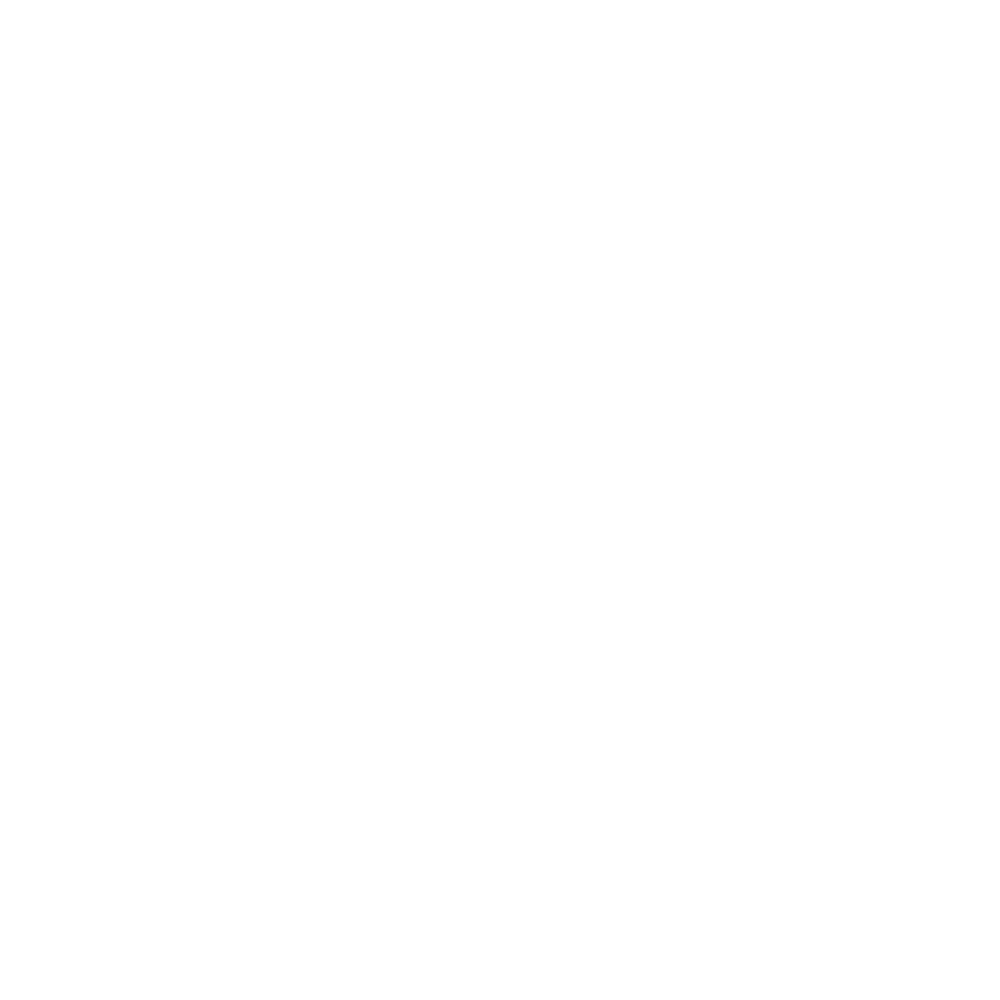

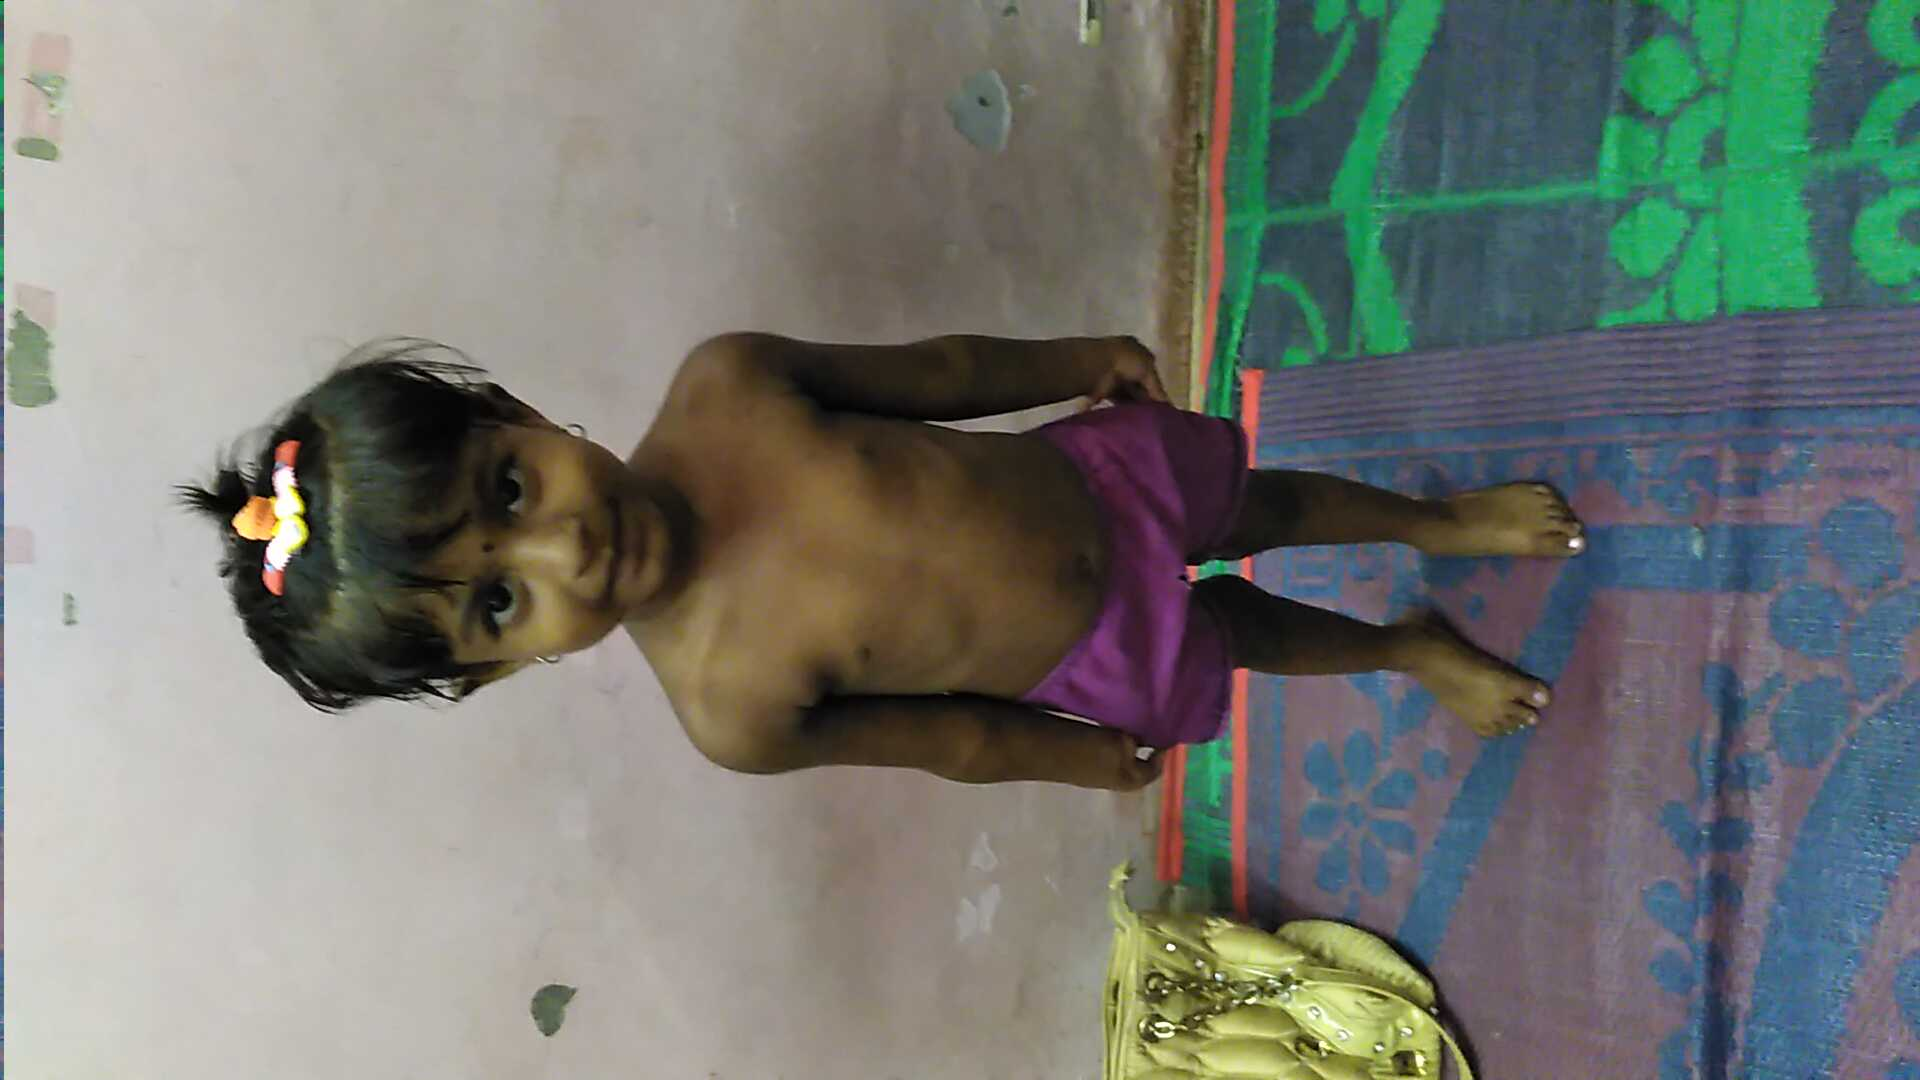

In [21]:
pcd_file = r'/whhdata/person/MH_WHH_0001/measurements/1536913319075/pc/pc_MH_WHH_0001_1536913319075_104_000.pcd'
jpg_file = r'/whhdata/person/MH_WHH_0001/measurements/1536913319075/rgb/rgb_MH_WHH_0001_1536913319075_104_7137.838129759.jpg'


from cgmcore.utils import load_pcd_as_ndarray

pcd = load_pcd_as_ndarray(pcd_file)
from cgmcore.utils import render_pointcloud
render_pointcloud(pcd, "A random pointcloud")


from IPython.display import Image
Image(jpg_file)


In the next step, the two files are fused together. The basis for this is the calibration file, containing the parameters for intrinsic and extrinsic parameters. 

The resulting point cloud can be view via a download and e.g. meshlab. 

<IPython.core.display.Javascript object>


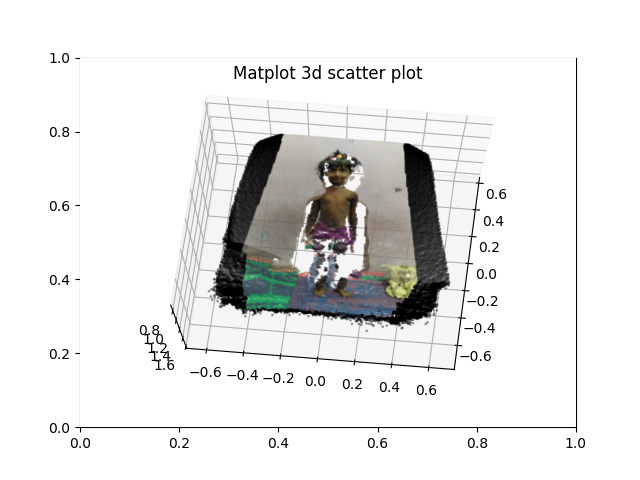

In [88]:

cali_file = '/whhdata/calibration.xml'

# the point cloud is fused and additionally the cloud is saved as ply in the same folder
fused_cloud = apply_fusion(cali_file, pcd_file, jpg_file)
    
x = fused_cloud.points["x"]
y = fused_cloud.points["y"]
z = fused_cloud.points["z"]
r = fused_cloud.points["red"]
g = fused_cloud.points["green"]
b = fused_cloud.points["blue"] 

c = np.column_stack((r / 255, g / 255, b / 255))
c = tuple(map(tuple,c )) 


%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, alpha=0.3, c=bob, edgecolors='face', s=1) #, label=group)
ax.view_init(elev=-100, azim=0)

plt.title('Matplot 3d scatter plot')
#plt.legend(loc=2)
plt.show()




<IPython.core.display.Javascript object>


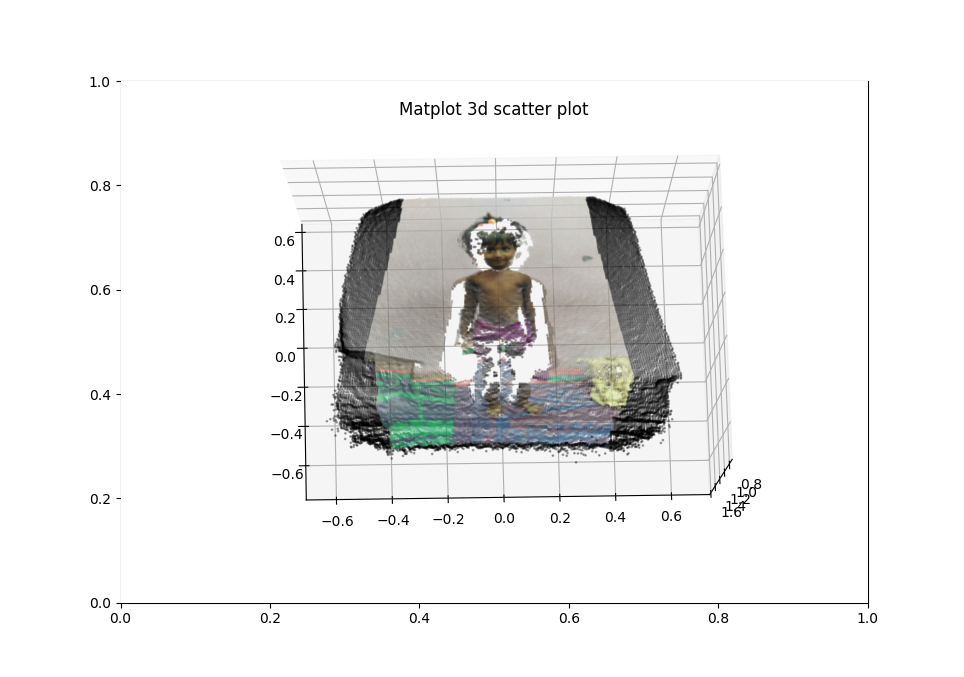

## Benefit for Machine Learning

The new result should be forwarded to pointnet, which should be able to process the data. The data should be forwarded as additional layer. Furthermore, this approach can be combined with the calculation of the normals.  